In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Clean Data

In [2]:
data = pd.read_csv('get_data/flavors_of_cacao.csv')

In [3]:
data.columns

Index(['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name',
       'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Rating',
       'Bean\nType', 'Broad Bean\nOrigin'],
      dtype='object')

rename the columns cause its hard to type

In [4]:
new_col_names = {
    'Company\xa0\n(Maker-if known)': 'company_name', #compnay name
    'Specific Bean Origin\nor Bar Name': 'bean_specific_origin', #The specific geo-region of origin for the bar.
    'REF': 'REF', #A value linked to when the review was entered in the database. Higher = more recent.
    'Review\nDate': 'review_date', #Date of publication of the review.
    'Cocoa\nPercent': 'cocoa_percent', #Cocoa percentage (darkness) of the chocolate bar being reviewed.
    'Company\nLocation': 'company_location', #Manufacturer base country.
    'Rating': 'rating', #Expert rating for the bar.
    'Bean\nType': 'bean_type', #The variety (breed) of bean used, if provided.
    'Broad Bean\nOrigin': 'bean_broad_origin' #The broad geo-region of origin for the bean.
}
data.rename(columns=new_col_names, inplace=True)

In [5]:
data.head()

,company_name,bean_specific_origin,REF,review_date,cocoa_percent,company_location,rating,bean_type,bean_broad_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


In [6]:
data.describe()

,REF,review_date,rating
count,1795.000000,1795.000000,1795.000000
mean,1035.904735,2012.325348,3.185933
std,552.886365,2.927210,0.478062
min,5.000000,2006.000000,1.000000
25%,576.000000,2010.000000,2.875000
50%,1069.000000,2013.000000,3.250000
75%,1502.000000,2015.000000,3.500000
max,1952.000000,2017.000000,5.000000


check null values

In [7]:
data.isnull().sum()

company_name            0
bean_specific_origin    0
REF                     0
review_date             0
cocoa_percent           0
company_location        0
rating                  0
bean_type               1
bean_broad_origin       1
dtype: int64

just drop null rows

In [8]:
data.dropna(axis=0, how='any', inplace=True)

Remove the percents in the cocoa_percent column and chagne type to numeric

In [9]:
def perc_to_fl(perc):
    return float(perc.strip('%'))

data['cocoa_percent'] = data['cocoa_percent'].map(lambda perc: perc_to_fl(perc))

check the bean_types

In [10]:
data['bean_type'].value_counts()

                            887
Trinitario                  418
Criollo                     153
Forastero                    87
Forastero (Nacional)         52
Blend                        41
Criollo, Trinitario          39
Forastero (Arriba)           37
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        6
Beniano                       3
EET                           3
Nacional (Arriba)             3
Matina                        3
Trinitario (85% Criollo)      2
Nacional                      2
Criollo (Ocumare 61)          2
Criollo (Amarru)              2
Forastero (Catongo)           2
Criollo, Forastero            2
Trinitario, Forastero         2
Amazon mix                    2
Amazon, ICS                   2
CCN51                         1
Trinitario, Nacional          1
Criollo (Wild)                1
Forastero(Arriba, CCN)        1
Criollo (Ocumare)             1
Trinitario (Scavina)          1
Foraster

In [11]:
#replace the values in the bean_type column
def replace_beans(b_type):
    #order of criollo, trinitario, and forastero was decided by seeing the number of times it appears
    if 'Criollo' in b_type:
        return 'Criollo'
    elif 'Trinitario' in b_type:
        return 'Trinitario'
    elif 'Forastero' in b_type:
        return 'Forastero'
    else:
        return b_type
    
data['bean_type'] = data['bean_type'].map(lambda b_type: replace_beans(b_type))

In [12]:
data['bean_type'].value_counts()

                     887
Trinitario           425
Criollo              225
Forastero            195
Blend                 41
Nacional (Arriba)      3
Matina                 3
Beniano                3
EET                    3
Amazon mix             2
Nacional               2
Amazon, ICS            2
Amazon                 1
CCN51                  1
Name: bean_type, dtype: int64

Those empty spaces aren't nulls, they're strings.<br>

check the bean origin

In [13]:
data['bean_broad_origin'].value_counts()

Venezuela                        214
Ecuador                          193
Peru                             165
Madagascar                       145
Dominican Republic               141
                                  73
Nicaragua                         60
Brazil                            58
Bolivia                           57
Belize                            49
Papua New Guinea                  42
Colombia                          40
Costa Rica                        38
Vietnam                           38
Tanzania                          34
Ghana                             33
Trinidad                          33
Mexico                            30
Guatemala                         28
Hawaii                            28
Domincan Republic                 25
Jamaica                           20
Grenada                           19
Indonesia                         16
Honduras                          15
Cuba                              11
Congo                             10
S

drop the rows with the empty string

In [14]:
data.drop(list(data[data['bean_broad_origin'] == '\xa0'].index), axis=0, inplace=True)

Seems good now - Let's section off data to the parts we only need

In [15]:
data.shape

(1720, 9)

In [16]:
df_cat = data[['rating', 'cocoa_percent', 'bean_type', 'bean_broad_origin', 'company_name', 'company_location' ]]

In [17]:
df_cat.head()

,rating,cocoa_percent,bean_type,bean_broad_origin,company_name,company_location
0,3.75,63.0,,Sao Tome,A. Morin,France
1,2.75,70.0,,Togo,A. Morin,France
2,3.00,70.0,,Togo,A. Morin,France
3,3.50,70.0,,Togo,A. Morin,France
4,3.50,70.0,,Peru,A. Morin,France


In [18]:
#turn to csv
#df_cat.to_csv('clean_flavors_of_cacao.csv', index=False)

## Clean Other Data

In [19]:
df = pd.read_csv('get_data/choco_rating_dataset.csv')

In [20]:
df.head()

,choco_bar_name,company_name,rating,comapany_loc,cocoa_perc,bean_type,bean_origin,company_flavor,CQ,sweetness,...,roast,intensity,complexity,structure,length,appearance,aroma,mouthfeel,flavor,quality
0,Nib Brittle,Theo,2.5,USA,65.0,Hybrid,Madagascar,Earthen,57.0,55.0,...,62.0,51.0,43.0,41.0,29.0,74.0,72.0,72.0,81.4,83.0
1,Vanilla Milk Choc,Theo,4.0,USA,NaN,Blend,NaN,Earthen,77.0,80.0,...,62.0,28.0,46.0,81.0,34.0,100.0,89.0,92.0,89.0,87.0
2,Ivory Coast,Theo,4.0,USA,75.0,Amazon,Ivory Coast,Earthen,53.0,42.0,...,71.0,37.0,36.0,80.0,82.0,92.0,82.0,85.3,88.4,86.5
3,Ghana-Panama-Ecuador,Theo,3.5,USA,75.0,Blend,(Ghana [Kumasi]; Panama [Bocas del Toro]; Ecua...,Crossover,44.0,48.0,...,63.0,45.0,52.0,39.0,81.0,100.0,80.0,82.0,86.4,87.0
4,Mad 65,Theo,4.0,USA,65.0,Criollo,Madagascar,Fruits,60.0,56.0,...,68.0,64.0,62.0,83.0,51.0,100.0,73.0,90.7,89.0,90.0


In [21]:
df.columns

Index(['choco_bar_name', 'company_name', 'rating', 'comapany_loc',
       'cocoa_perc', 'bean_type', 'bean_origin', 'company_flavor', 'CQ',
       'sweetness', 'acidity', 'bitterness', 'roast', 'intensity',
       'complexity', 'structure', 'length', 'appearance', 'aroma', 'mouthfeel',
       'flavor', 'quality'],
      dtype='object')

In [22]:
#there is a mispelling in one of the column names
df.rename({'comapany_loc': 'company_loc'}, axis=1, inplace=True)

In [23]:
#seperate columns we want 
df_num = df[['choco_bar_name', 'company_name', 'company_loc', 'rating','cocoa_perc', 'CQ', 'sweetness', 
             'acidity','bitterness', 'roast', 'intensity', 'complexity', 'structure', 'length', 
             'appearance', 'aroma', 'mouthfeel', 'flavor', 'quality']]
df_num.head()

,choco_bar_name,company_name,company_loc,rating,cocoa_perc,CQ,sweetness,acidity,bitterness,roast,intensity,complexity,structure,length,appearance,aroma,mouthfeel,flavor,quality
0,Nib Brittle,Theo,USA,2.5,65.0,57.0,55.0,48.0,37.0,62.0,51.0,43.0,41.0,29.0,74.0,72.0,72.0,81.4,83.0
1,Vanilla Milk Choc,Theo,USA,4.0,NaN,77.0,80.0,30.0,7.0,62.0,28.0,46.0,81.0,34.0,100.0,89.0,92.0,89.0,87.0
2,Ivory Coast,Theo,USA,4.0,75.0,53.0,42.0,40.0,49.0,71.0,37.0,36.0,80.0,82.0,92.0,82.0,85.3,88.4,86.5
3,Ghana-Panama-Ecuador,Theo,USA,3.5,75.0,44.0,48.0,76.0,50.0,63.0,45.0,52.0,39.0,81.0,100.0,80.0,82.0,86.4,87.0
4,Mad 65,Theo,USA,4.0,65.0,60.0,56.0,76.0,20.0,68.0,64.0,62.0,83.0,51.0,100.0,73.0,90.7,89.0,90.0


In [24]:
df.describe()

,rating,cocoa_perc,CQ,sweetness,acidity,bitterness,roast,intensity,complexity,structure,length,appearance,aroma,mouthfeel,flavor,quality
count,1570.000000,1374.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000,1570.000000
mean,3.018471,66.821179,45.935987,54.559236,40.122293,38.735669,60.696624,59.068153,46.925796,57.303121,64.878344,82.942675,77.460510,79.981783,81.335860,78.410828
std,1.179132,15.296827,21.293000,19.017435,21.430406,20.416119,17.853654,18.693559,21.118857,21.211648,14.701616,13.881701,12.013007,10.640359,13.252829,16.040808
min,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,10.000000,27.300000,8.000000,5.000000
25%,2.500000,62.000000,31.000000,41.000000,23.000000,24.000000,52.000000,48.000000,31.000000,42.000000,56.000000,76.000000,71.000000,76.000000,76.600000,74.000000
50%,3.000000,70.000000,44.000000,53.000000,37.000000,36.000000,63.000000,61.000000,46.000000,60.000000,67.000000,86.000000,79.000000,81.300000,85.600000,82.000000
75%,4.000000,75.000000,62.000000,69.000000,53.000000,51.000000,74.000000,73.000000,62.000000,76.000000,76.000000,94.000000,86.000000,86.700000,90.000000,89.000000
max,5.000000,100.000000,96.000000,98.000000,98.000000,94.000000,99.000000,99.000000,96.000000,98.000000,99.000000,120.000000,98.000000,106.700000,98.200000,99.500000


check for any columns with numbers greater than the upper limit which is 100 for the numeric columns

In [25]:
for cols in df_num.columns[4:]:
    print(cols)
    print(df_num[df_num[cols] > 100].shape)



cocoa_perc
(0, 19)
CQ
(0, 19)
sweetness
(0, 19)
acidity
(0, 19)
bitterness
(0, 19)
roast
(0, 19)
intensity
(0, 19)
complexity
(0, 19)
structure
(0, 19)
length
(0, 19)
appearance
(6, 19)
aroma
(0, 19)
mouthfeel
(2, 19)
flavor
(0, 19)
quality
(0, 19)


drop columns which have different scaled values (past 100)

In [26]:
drop_indexes = []
#go through columns
for cols in df_num.columns[4:]:
    #get the indexes of row values past 100
    drop_ind = list(df_num[df_num[cols] > 100].index)
    #check if there is a value in the list
    if len(drop_ind) > 0:
        #add to current list
        drop_indexes = drop_indexes + drop_ind
#drop indexes
df_num.drop(drop_indexes, axis=0, inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


check for null values

In [27]:
print(df_num.shape)
df_num.isnull().sum()

(1562, 19)


choco_bar_name      0
company_name        0
company_loc         0
rating              0
cocoa_perc        195
CQ                  0
sweetness           0
acidity             0
bitterness          0
roast               0
intensity           0
complexity          0
structure           0
length              0
appearance          0
aroma               0
mouthfeel           0
flavor              0
quality             0
dtype: int64

check if we can replace the null values with the mean or median

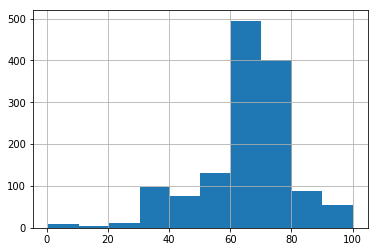

In [28]:
#original
df_num.cocoa_perc.hist()

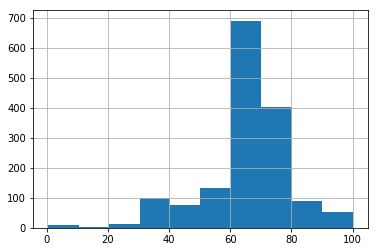

In [29]:
#mean
df_num['cocoa_perc'].fillna(round(df_num['cocoa_perc'].mean())).hist()

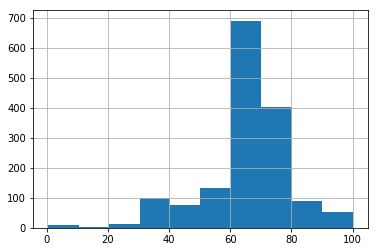

In [30]:
#median
df_num['cocoa_perc'].fillna(df_num['cocoa_perc'].median()).hist()

looks like replacing the null values would deviate away from normalization and increae the kurtosis, visually.<br>
Just drop the null values

In [31]:
df_num.dropna(axis=0, how='any', inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
print(df_num.shape)
df_num.isnull().sum()

(1367, 19)


choco_bar_name    0
company_name      0
company_loc       0
rating            0
cocoa_perc        0
CQ                0
sweetness         0
acidity           0
bitterness        0
roast             0
intensity         0
complexity        0
structure         0
length            0
appearance        0
aroma             0
mouthfeel         0
flavor            0
quality           0
dtype: int64

looks good now

lets just scale the rating to out of 100 instead of out of 5 so that it can be on the same scale as the others

In [33]:
df_num.head()

,choco_bar_name,company_name,company_loc,rating,cocoa_perc,CQ,sweetness,acidity,bitterness,roast,intensity,complexity,structure,length,appearance,aroma,mouthfeel,flavor,quality
0,Nib Brittle,Theo,USA,2.5,65.0,57.0,55.0,48.0,37.0,62.0,51.0,43.0,41.0,29.0,74.0,72.0,72.0,81.4,83.0
2,Ivory Coast,Theo,USA,4.0,75.0,53.0,42.0,40.0,49.0,71.0,37.0,36.0,80.0,82.0,92.0,82.0,85.3,88.4,86.5
3,Ghana-Panama-Ecuador,Theo,USA,3.5,75.0,44.0,48.0,76.0,50.0,63.0,45.0,52.0,39.0,81.0,100.0,80.0,82.0,86.4,87.0
4,Mad 65,Theo,USA,4.0,65.0,60.0,56.0,76.0,20.0,68.0,64.0,62.0,83.0,51.0,100.0,73.0,90.7,89.0,90.0
6,85% Blend,Venchi,Italy,3.5,85.0,23.0,21.0,8.0,70.0,76.0,52.0,10.0,78.0,69.0,92.0,84.0,83.3,84.2,82.5


In [34]:
#turn to csv
#df_num.to_csv('clean_choco_rating_dataset.csv', index=False)